# Jupyter Notebook zum Import/Export, zur Analyse und Darstellung von Zeitreihendaten
[Module: python pandas, matplotlib, numpy]


## 1. Funktionen definieren
hier werden Funktionen definiert, die in unteren Zellen aufgerufen werden.
1. plotdf: grafische Darstellung der Zeitreihen
2. getdf_frommulticsv: Import der csv-Daten in einen Datenframe (df)

In [1]:
import matplotlib.pyplot as plt
import warnings
import numpy as np
import pandas as pd
import datetime as dt
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None  #pandas Warnungen ausblenden
df = pd.DataFrame(np.random.randn(3, 2), columns=list('AB')) #df-dummy wird in nächster Zelle überschireben

def plotdf(df, startdate,enddate):
     
    plt.rcParams['figure.figsize'] = [20,15] 
    plt.rcParams['figure.dpi'] = 200
    colortable=['b','g', 'r', 'c', 'm', 'y', 'k', 'b', 'g', 'r', 'c', 'm', 'y', 'k']
    dfloc=df.loc[startdate:enddate]
    dflen=len(df.columns)
    fig, ax=plt.subplots(dflen)
    #ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    for i, col in enumerate(dfloc.columns):
        plt.subplot(dflen,1,i+1)
        #print(col.find('_p'))
        if col.find('_p')==-1:
            dfloc[col].plot(sharex=plt.gca(),color=colortable[i],label=col,linewidth=1,grid=True)
        else:
            dfloc[col].plot(sharex=plt.gca(),color=colortable[i],marker='|',label=col,grid=True,linestyle=None)
        plt.legend(loc="lower left")
        

def getdf_frommulticsv(ndays,link="https://uni-wuppertal.sciebo.de/s/rEFPb7PQd3yTMNV/download?path=%2F&files=",fileend='.txt'):
    
    fname=dt.datetime.today().strftime('%Y%m%d')+fileend
    filelink=link+fname
    
    df=pd.read_csv(filelink,index_col=None, sep=';',header=None)
    #todaystr=datetime.today().strftime('%Y%m%d')
    i=1
    while i<ndays:
        datestr=(dt.datetime.today()-dt.timedelta(days=i)).strftime('%Y%m%d')
        #print(datestr)
        fname=datestr+fileend
        filelink=link+fname
        try:
            dfi=pd.read_csv(filelink,index_col=None, sep=';',header=None)
            df=df.append(dfi)
        except:
            print(fname+' not found on File Server')
        i+=1
    df[0] = pd.to_datetime(df[0],format="%d.%m.%Y %H:%M:%S")
    del df[8]
    df[3][df[2]<100]=np.NaN #conditional set values to NaN
    df[2][df[2]<100]=np.NaN
    df[1][df[2]<100]=np.NaN
    df[1][df[1]<0]=np.NaN
    df.columns = ['date','r1min','mabs','rsum','T','H','p','U']
    df.set_index('date', inplace=True)
    df=df.loc[df.index.notnull()]
    df=df.sort_index()
    return(df)

def exportdf_toexcel_withcharts(df,outfilep):
    #import xlsxwriter
    import pandas as pd
    from datetime import datetime
    writer = pd.ExcelWriter(outfilep, engine='xlsxwriter')
    df.to_excel(writer, sheet_name='Tab1')
    
    workbook = writer.book
    worksheet = writer.sheets['Tab1']
    colortable=['#708090','#B0C4DE','#F4A460','#0000CD','#1E90FF', '#48D1CC','#3CB371', '#006400', '#FFFF00','#FF8C00','#800000']
    dfnrows,dfncols=df.shape
    xl0date = datetime(1899, 12, 30)
    mindate=datetime.strptime(str(df.index[0]),'%Y-%m-%d %H:%M:%S')
    maxdate=datetime.strptime(str(df.index[-1]),'%Y-%m-%d %H:%M:%S')
    mindatexl=float((mindate-xl0date).days) + (float((mindate-xl0date).seconds) / 86400)
    maxdatexl=float((maxdate-xl0date).days) + (float((maxdate-xl0date).seconds) / 86400)
    
    for colnr in range(1,dfncols+1): 
        posindex=(chr(98+dfncols)).upper()+str((colnr-1)*7+2)
        colname=df.columns[colnr-1]
        #if colname[-1]=='p':
        chart = workbook.add_chart({'type': 'scatter',
                                   'subtype': 'straight'})
        # Configure the series of the chart from the dataframe data
        chart.add_series({
            'categories': ['Tab1', 1, 0, dfnrows, 0],
            'values':     ['Tab1', 1, colnr, dfnrows, colnr],
            'line': {'color': colortable[colnr-1]},
        })
        # Configure the chart axes.
        chart.set_x_axis({ 'position_axis': 'on_tick','text_axis': True,'min':mindatexl, 'max':maxdatexl, 'num_font': {'rotation': -45},'major_gridlines': {'visible': True}})
        chart.set_y_axis({'name': colname, 'major_gridlines': {'visible': True}})
        #chart.set_x_axis({'num_font': {'rotation': -45}})
        # Turn off chart legend. It is on by default in Excel.
        chart.set_legend({'position': 'none'})
        # Insert the chart into the worksheet.
        worksheet.insert_chart(posindex, chart,{'x_scale': 1.8, 'y_scale': 0.83})
    
    writer.save()

## 2. Datenframe von CSV einlesen
Parameter festlegen:
ndays: Anzahl der Tage die von heute ausgehend dargestellt werden sollen

In [2]:
#AUSWAHL
ndays=7 #Anzahl der Tage von heute ausgehend, die im Datenframe abgebildetet werden sollen

df=getdf_frommulticsv(ndays)
df.head() #zeigt die ersten 5 Zeilen

,r1min,mabs,rsum,T,H,p,U
date,,,,,,,
2020-03-05 00:00:00,0.0,6293.630,1.578,4.76,82.70,990.14,13.34
2020-03-05 00:01:00,0.0,6293.614,0.000,4.74,82.18,990.14,13.39
2020-03-05 00:02:00,0.0,6293.614,0.000,4.74,82.46,990.12,13.39
2020-03-05 00:03:00,0.0,6293.610,0.000,4.75,83.38,990.06,13.34
2020-03-05 00:04:00,0.0,6293.612,0.000,4.73,82.60,990.12,13.34


## 3. Datenframe ergänzen/analysieren
- Hinzufügen von Spalten mit NAN-Analyse-Werten 
- Ausgabetabelle mit NAN-Werten für jeden Tag

In [3]:
df=df.resample("1min").max() #erstellt für jede Minute eine Messwertzeile und übernimmt vorhandene Werte, Lücken erhalten den Wert: NAN
df['nan']=np.where((df.isnull().all(1)),1,0)  #legt eine Spalte 'nan' an: 1 kein Messwert in Minutenreihe, 0 Messwerte vorhanden
df['nanr']=np.where((df['mabs'].notna()==0)&(df['nan']==0),1,0)  #Spalte nanr, Regenwert fehlt: 1; Regenwert vorhanden oder ganze Zeile fehlt:0
cols=['nan','nanr']
df['nan_sum']=df[cols].sum(axis=1).groupby(df.index.date).cumsum()  #Summenlinie beider nan-Werte mit täglichem Reset
df['nan_sum'].groupby(df.index.date).max()

2020-03-05    139
2020-03-06      2
2020-03-07      2
2020-03-08      2
2020-03-09      2
2020-03-10      2
2020-03-11      1
Name: nan_sum, dtype: int64

## 4. Datenframe plotten

Erzeugen eines Multi-Linien-Plots

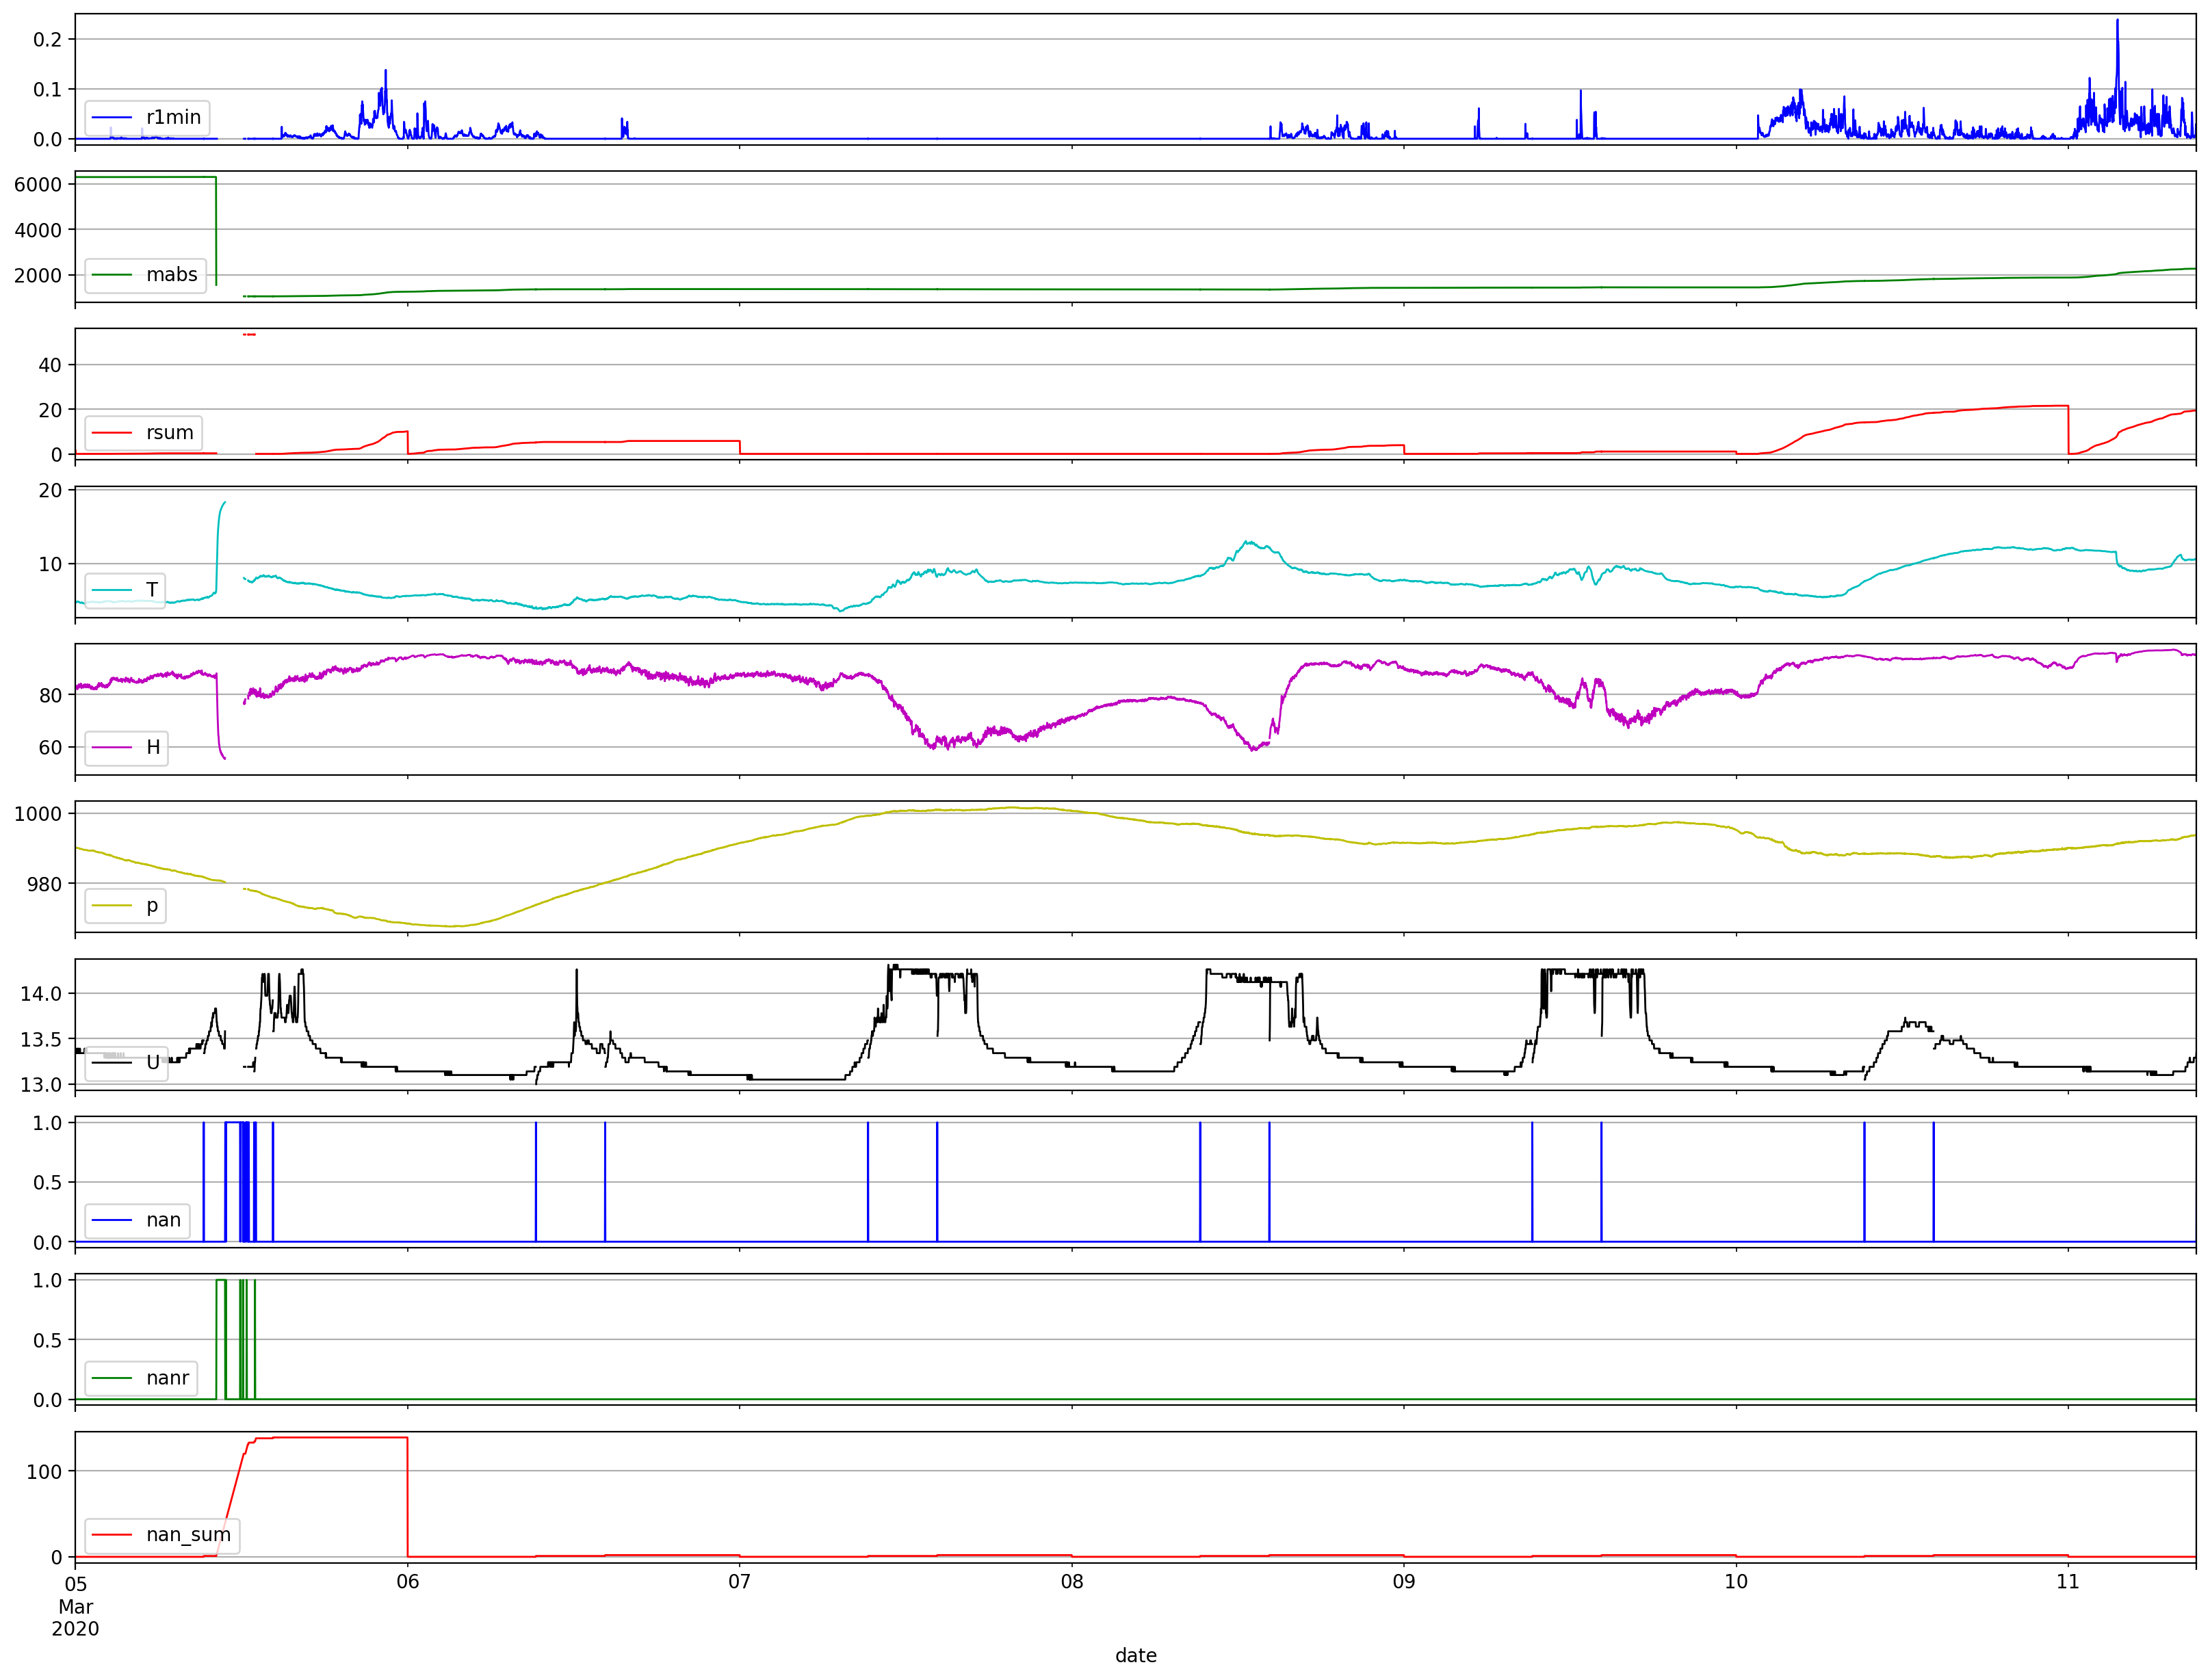

In [4]:
## Darstellung der ganzen Zeitspanne
startdate=str(df.index[0])
enddate=str(df.index[-1])
## alternativ: Festlegen eines Zeitabschnitts zur Darstellung (df muss den Zeitraun abdecken, siehe 2.)
#startdate="2020-02-26 00:00:00"
#enddate="2020-02-26 18:00:00"
## Aufruf der Plot-Funktion (siehe 1.)
plotdf(df,startdate,enddate)
plt.savefig('myplot.png',dpi=300)



## 5. Export der Daten

- Datenframe als csv-Datei sowie Plot als PNG
- Dateien Speichern (siehe Screenshot)

<img src="image1.png" width="300">

In [5]:
df.to_csv('mycsv.csv')
exportdf_toexcel_withcharts(df,'MyExcelFile.xlsx')